In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('emails.csv')  # replace with your path
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (5172, 3002)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [35]:
df.dropna(how='any', inplace=True)


In [36]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=10
)

In [37]:
def report(classifier, x_test, y_test):
    """
    Evaluate a classifier:
    - Accuracy, Precision, Recall
    - Confusion matrix
    - Precision-Recall & ROC plots (if classifier supports probabilities)
    """
    # Predict
    y_pred = classifier.predict(x_test)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {classifier.__class__.__name__}')
    plt.show()
    

### K-Nearest Neighbours Classifier

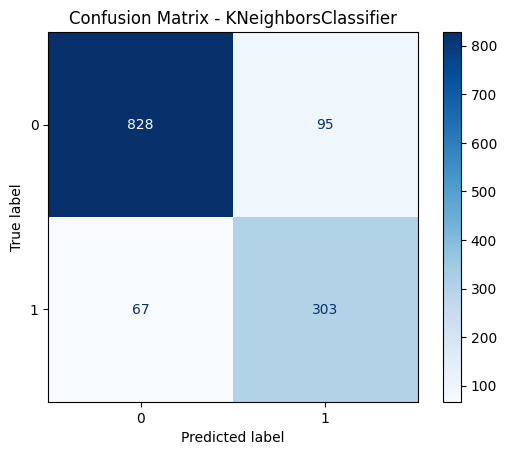

In [39]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(x_train, y_train)
report(kNN, x_test, y_test)


In [41]:
from sklearn.svm import SVC
svm = SVC(gamma='auto',random_state=10)
svm.fit(x_train,y_train)

SVC(gamma='auto', random_state=10)

In [44]:
report(svm)

TypeError: report() missing 2 required positional arguments: 'x_test' and 'y_test'